In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('image.png')


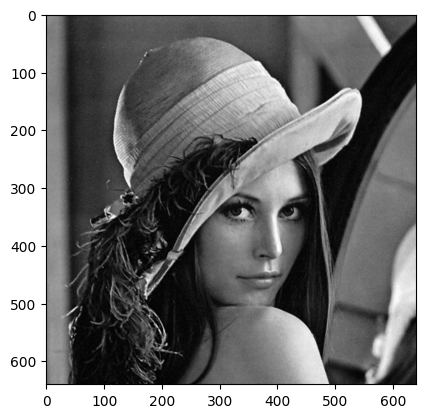

In [10]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [11]:

height, width, channels = img.shape
print(f"Height: {height}, Width: {width}, Channels: {channels}")


Height: 640, Width: 641, Channels: 3


In [12]:

total_pixels = height * width
print(f"Total pixels in the image: {total_pixels}")


Total pixels in the image: 410240


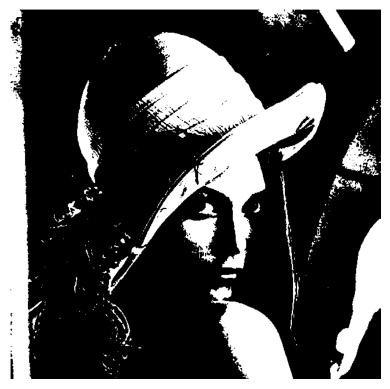

Area of black pixels: 311163


In [14]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_binary, cmap='gray')
plt.axis('off')
plt.show()

img_binary = np.uint8(img_binary)

# Count the number of black pixels (value 0 in binary image)
black_pixels = np.count_nonzero(img_binary == 0)

print(f"Area of black pixels: {black_pixels}")

Task-2: Edge Detection and Image Segmentation

Sobel edge detection

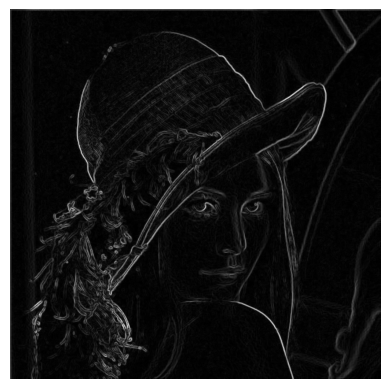

In [15]:
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')
plt.show()


Prewitt edge detection

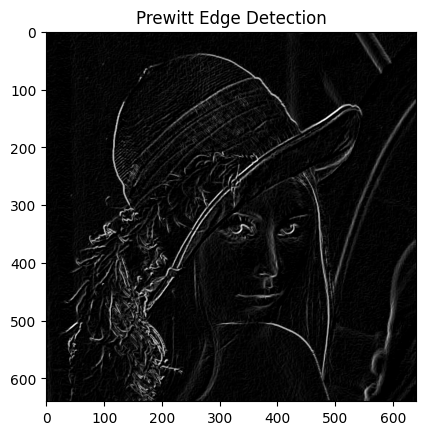

In [17]:

kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

prewitt_x = cv2.filter2D(img_gray, -1, kernel_x)
prewitt_y = cv2.filter2D(img_gray, -1, kernel_y)
prewitt_x = np.float32(prewitt_x)
prewitt_y = np.float32(prewitt_y)

prewitt_edges = cv2.magnitude(prewitt_x, prewitt_y)

plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.show()

Roberts edge detection

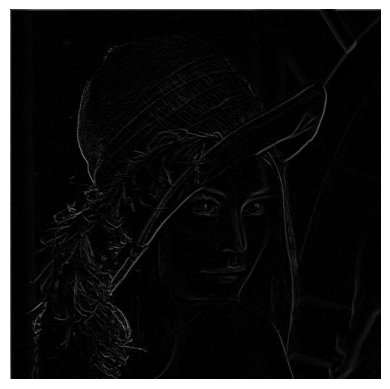

In [19]:
kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

roberts_x = cv2.filter2D(img_gray, -1, kernel_x)
roberts_y = cv2.filter2D(img_gray, -1, kernel_y)
roberts_x = np.float32(roberts_x)
roberts_y = np.float32(roberts_y)
roberts_edges = cv2.magnitude(roberts_x, roberts_y)
plt.imshow(roberts_edges, cmap='gray')
plt.axis('off')
plt.show()

Canny edge detection


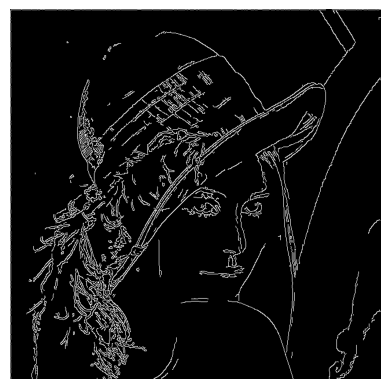

In [20]:
edges_canny = cv2.Canny(img_gray, 100, 200)

plt.imshow(edges_canny, cmap='gray')
plt.axis('off')
plt.show()


Global thresholding segmentation

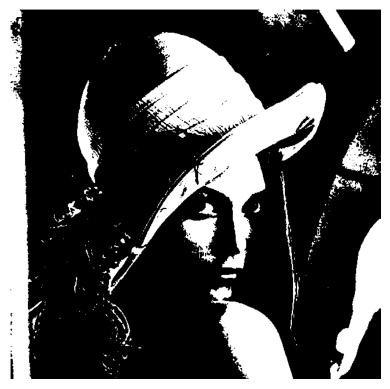

In [21]:
_, img_segmented_global = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_segmented_global, cmap='gray')
plt.axis('off')
plt.show()


Adaptive thresholding segmentation

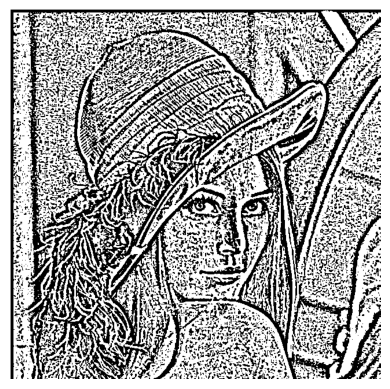

In [22]:
img_segmented_adaptive = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(img_segmented_adaptive, cmap='gray')
plt.axis('off')
plt.show()


Watershed segmentation (unknown region subtraction)

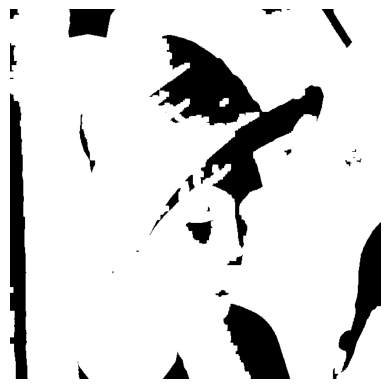

In [29]:

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, binary_image = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)
binary_image = np.uint8(binary_image)

kernel = np.ones((3, 3), np.uint8)

binary_image = cv2.dilate(binary_image, kernel, iterations=1)

sure_bg = cv2.dilate(binary_image, kernel, iterations=3)

dist_transform = cv2.distanceTransform(binary_image, cv2.DIST_L2, 5)

_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_bg = np.uint8(sure_bg)
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)

plt.imshow(unknown, cmap='gray')
plt.axis('off')
plt.show()